## Data Analysis of the FIFA dataset  

  ### About the data - 
- FIFA is the Fédération Internationale de Football Association for some people fifa is not just a game it is an emotion.
- There are hundereds of clubs and thousands of players playing for them from various nationality across all over the globe. 
- The dataset contains 88 columns and 18207 rows.
- To analyse tha data using python libraries pandas and numpy and for data visualisation using plotly library.
- Let's analyse the data and try to answer some interesting questions.

## Data source
- https://www.kaggle.com/karangadiya/fifa19

## Tasks performed in this analysis
- Best players for each position via overall rating.
- The total number of right foot and left foot players
- Check if the preferred foot of the players has any impact on the position of a player
- Discover how many players have a wage which is in the range 100k-500k.
- Display the distribution of the player's nationalities.
- Find the average rating of players per country.
    - Following this analysis, find the list of the countries with the best players.
- Display the distribution of the positions of all players.
- When does the contract expire for the players?
- The distribution of players values.
- The age distribution among players.
- The top 10 potential players.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the csv file
data = pd.read_csv('fifa_data.csv')
data.drop(columns='Unnamed: 0',inplace=True)
data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
#number of rows and columns
data.shape

(18207, 88)

In [4]:
# column names
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

## Best players for each position via overall rating.

- 'Name' - football players name.
- 'overall rating' - players rating given in numerical value.
- 'position' - players playing position on ground.
- 'ID' - unique id of each player.

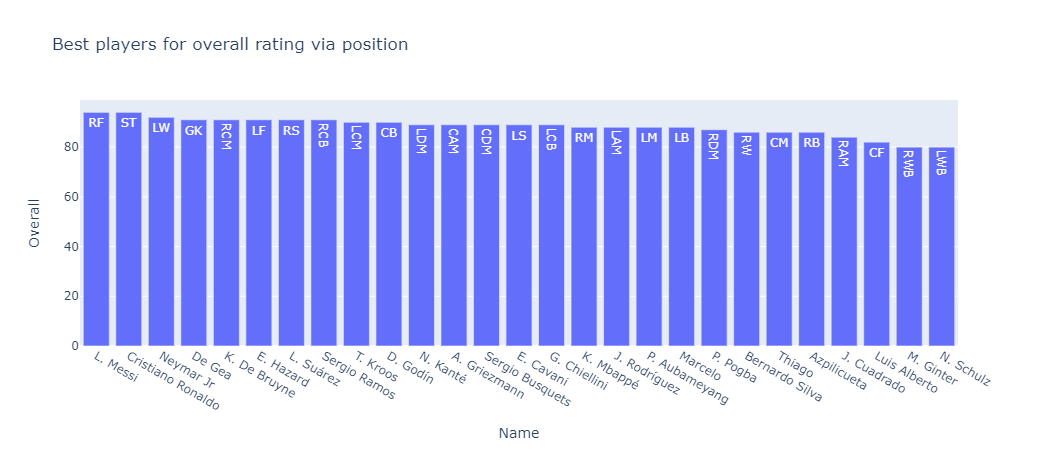

In [9]:
#read 2 columns from the dataset
best_player = data.filter(['ID','Name','Position','Overall'])
#checking null values
best_player.isnull().sum()
#drop null values
best_player.dropna(inplace=True)
#check duplicate values in column ID
duplicate = best_player[best_player.duplicated('ID')]
#create a new column and rank the values of 'overall' column
best_player['rank_overall'] = best_player.groupby(['Position'])['Overall'].rank(method='first',ascending=False).astype(np.int32)
#condition- read only rank 1 rows
best_player = best_player[best_player.rank_overall==1]
#create bar graph to compare best players on diff positions 
fig = px.bar(data_frame=best_player, x='Name', y='Overall',
            text="Position",labels={'x': 'Player Name', 'y': 'Overall rating'},title='Best players for overall rating via position')
fig.update_traces(textposition='inside')
fig.show()

### Observation 
- X-axis represent name of the players
- Y-axis represent players overall rating
- The bar graph shows 27 players.
- Each bar is the unique position on the field.
- For RF position L.Messi with 94 points and for LCM position T.Kroos with 90 rating are best in their respective position.

## The total number of right foot and left foot players
- 'id' - unique id of each player.
- 'Preferred Foot' - while playing player preferred foot.

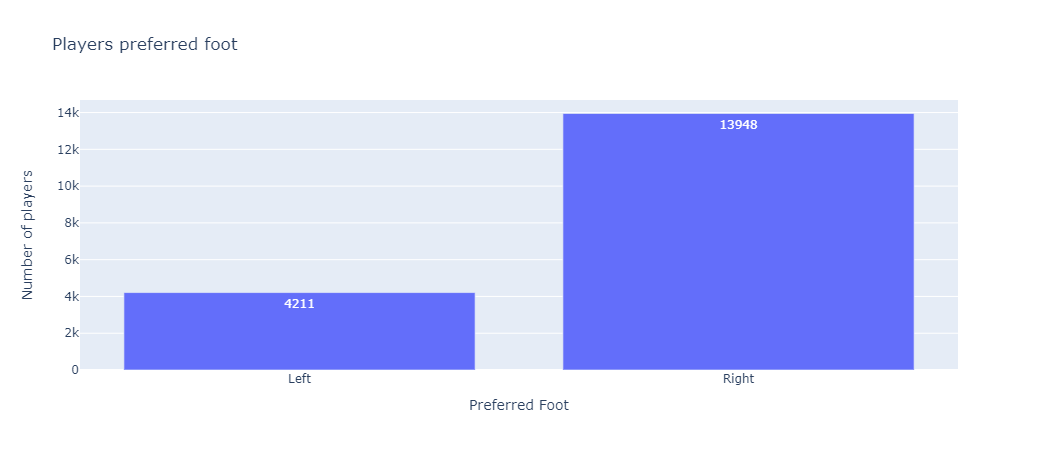

In [6]:
#read 2 columns from dataset
preferred_foot = data.filter(['ID','Preferred Foot'])
#check null values
preferred_foot.isnull().sum()
#drop null values
preferred_foot.dropna(inplace=True)
#groupby function split the data into groups
preferred_foot = pd.DataFrame(preferred_foot.groupby(['Preferred Foot']).agg(count_foot=('Preferred Foot','count')))
#reset index to default
preferred_foot.reset_index(level=0,inplace=True)
#create bar graph using plotly
fig = px.bar(data_frame=preferred_foot, x='Preferred Foot', y='count_foot',
            title='Players preferred foot',text='count_foot')
fig.update_traces(textposition='inside')
fig.update_xaxes(title_text="Preferred Foot")
fig.update_yaxes(title_text="Number of players")
fig.show()

### Observation 
- X-axis represent player preferred foot
- Y-axis represent number of players
- The bar graph shows that there are a total 18159 players in which 4211 preferred left foot and 13948 preferred right foot.
- In percentage only 23.2% of players prefer left foot and 76.8% players prefer right foot.

## Distribution of preferred foot per position
- 'id' - unique id of each player.
- 'Preferred Foot' - while playing player preferred foot.
- 'Position' - player playing position.

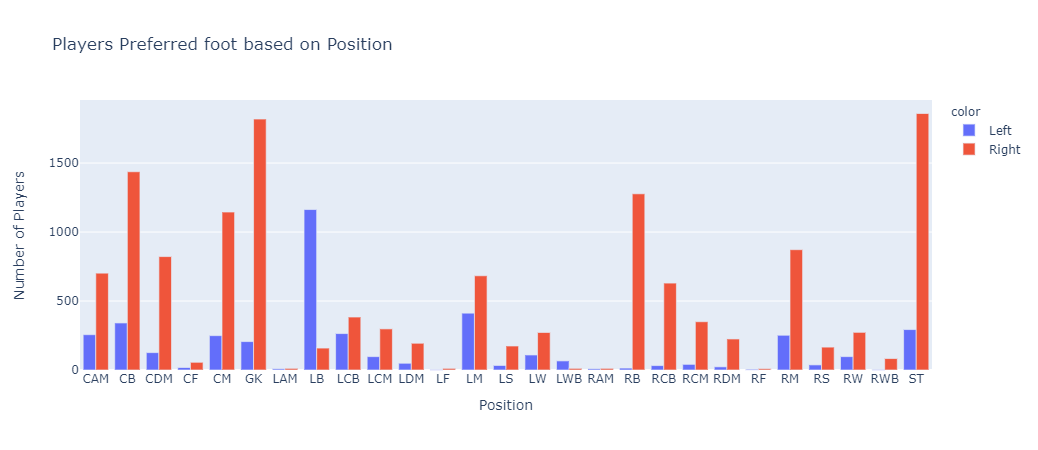

In [7]:
impact = data.filter(['ID','Preferred Foot','Position'])
impact = impact.groupby(['Position','Preferred Foot']).agg(foot_count=('Preferred Foot','count'))
impact.reset_index(level=[0,1],inplace=True)
# left = impact[impact['Preferred Foot']=='Left']
# right = impact[impact['Preferred Foot']=='Right']
fig = px.bar(x=impact.Position, y=impact.foot_count, color=impact['Preferred Foot'], barmode='group',
             labels={'x': 'Position', 'y': 'Number of Players'},title='Players Preferred foot based on Position')
fig.show()

### Observation
- X-axis represent position.
- Y-axis represent number of players.
- In position LB(Linebacker) and LWB(Left wing back) the left foot players are more than right foot players.
- Maximum right foot players are ST(Striker) followed by GK(Goal Keeper).

## Discover how many players have a wage which is in the range 100k-500k. 
- 'ID' - unique identity number of each player
- 'wage' - each player wages 
- 'Name' - players name

Unknown
- We don't know if the wages are defined on a weekly or monthly basis.

In [8]:
#define a function which replace and remove special characters
def change_form_of_value(value):
    change = value.replace("€", "")
    if "M" in change:
        change = float(change.replace("M",""))*1000000
    elif "K" in change:
        change = float(change.replace("K", "")) * 1000
    return float(change)
#define a function based on condition
def range_wage(x):
    if 100000 <= x <= 500000:
        return x

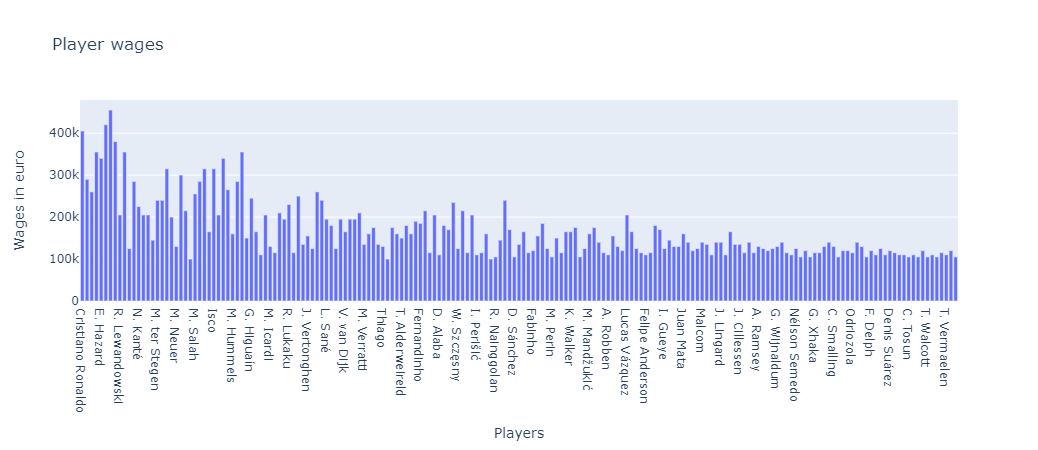

In [9]:
#read data from dataset
player_wage = data.filter(['ID','Name','Wage'])
#cereate a new column apply function
player_wage['actual_wage'] = player_wage['Wage'].apply(change_form_of_value)

# test_123 = player_wage[player_wage.actual_wage >= 100000 & player_wage.actual_wage <= 500000]

player_wage['wage_euro'] = player_wage.actual_wage.apply(range_wage)
#drop null values
player_wage.dropna(inplace=True)
#drop unnecessary columns
player_wage.drop(columns=['Wage','actual_wage'],inplace=True)
#plot a bar graph
fig = px.bar(data_frame=player_wage, x='Name', y='wage_euro',
            title='Player wages')
fig.update_xaxes(title_text="Players")
fig.update_yaxes(title_text="Wages in euro")
fig.show()

### Observation
- X-axis represent players name.
- Y-axis represent wages in euros.
- Total 187 players whose wages lies between 100k to 500k.
- L.Suarez has a maximum wage(455k) followed by L.Modric(420k).

## Display the distribution of the players nationalities

- 'ID' - unique identity number of each player
- 'Nationality' - define on the basis of players.

ID             0
Nationality    0
dtype: int64
(164, 2)


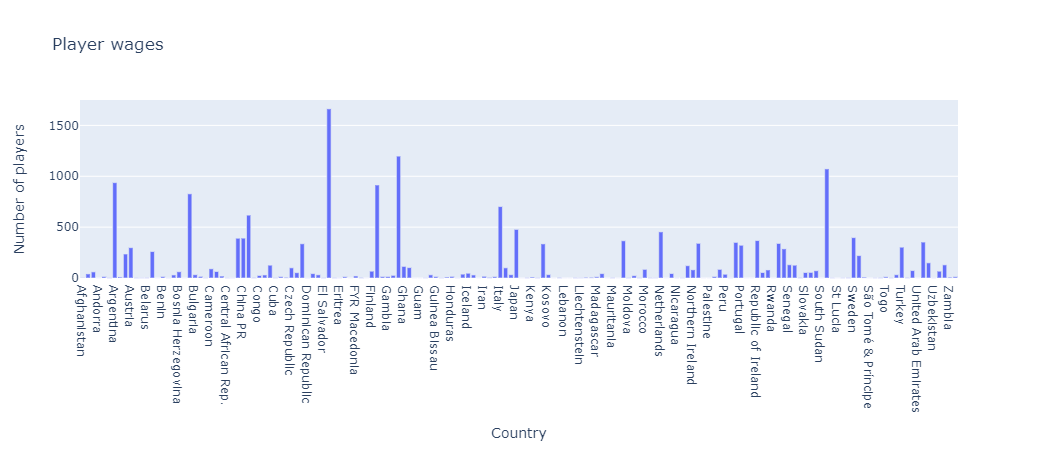

In [10]:
test = data.filter(['ID','Nationality'])
print(test.isnull().sum())
test = pd.DataFrame(test.groupby(['Nationality']).ID.count())
test.reset_index(level=0,inplace=True)
print(test.shape)
fig = px.bar(x=test.Nationality, y=test.ID,
            title='Player wages',labels={'x':'Country','y':'Number of players'})
fig.show()

### Observation
- X-axis represent country.
- Y-axis represent number of players.
- Total 164 countries in a data set.
- Maximum number of players comes from England followed by Germany and Spain.

## Find the average rating of players per country. Following this analysis, find the list of the countries with the best players.

- 'overall rating'
- 'Nationality'

Limitation
- No data available for country rating.

Assumption
- Country rating can be defined as a function of overall player rating.

Since some countries provide more players than others as we have observed in the grpahs above, we compute the weighted average to calculate the country rating based on it's players. 

For example, if one country provides a player with 98 rating than the average value is biased. By using weighted average, we will include the contribution of a country in term of the number of players provided to FIFA along with the value of each player. Therefore, countries who provide fewer top player might be ranked lower than the countries providing more number of above average skills.

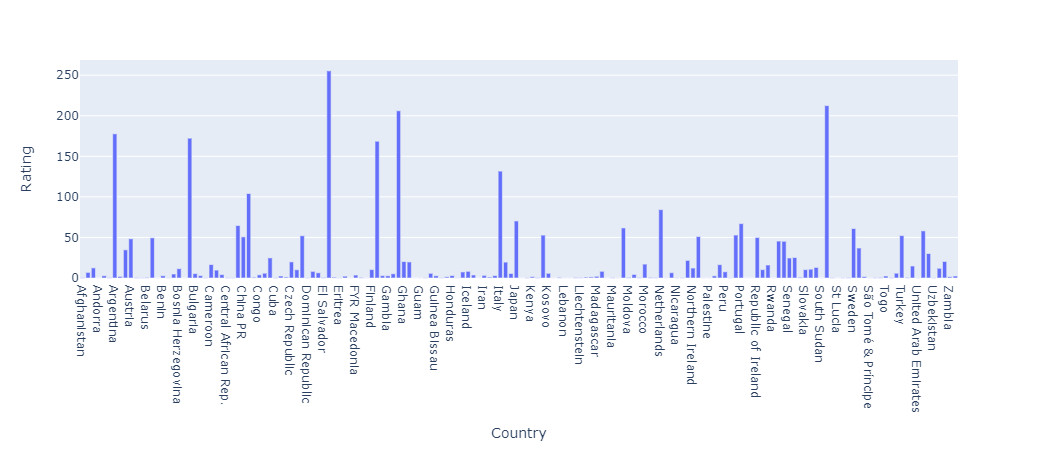

In [6]:
new_dataset = data.filter(['ID','Nationality','Overall'])
new_dataset['bin'] = pd.cut(x=new_dataset.Overall,bins=5,labels=[1,2,3,4,5] )
new_dataset.bin.unique()
groups = new_dataset.groupby(['Nationality','bin']).ID.count().reset_index(level=[0,1])
groups.rename(columns={'ID': 'n_players'}, inplace=True)
avg_score = new_dataset.groupby(['Nationality', 'bin']).Overall.mean().reset_index(level=[0,1])
avg_score.Overall.fillna(0, inplace=True)
solution_2 = groups.merge(avg_score, on = ['Nationality','bin'])
solution_2['new_col'] = solution_2.bin.astype(np.int32) * solution_2.n_players
solution_2['new_bin'] = solution_2.bin.astype(np.int32)
new_avg = solution_2.groupby(['Nationality']).agg({'new_col': 'sum', 'new_bin':'sum'})
new_avg['weighted_avg'] = new_avg.new_col/new_avg.new_bin
new_avg.reset_index(level=[0], inplace=True)
fig = px.bar(x=new_avg.Nationality, y=new_avg.weighted_avg,labels={'x':'Country','y':'Rating'})
fig.show()

### Observation
- X-axis represent country.
- Y-axis represent overall rating.
- There are 164 countries in a dataset.

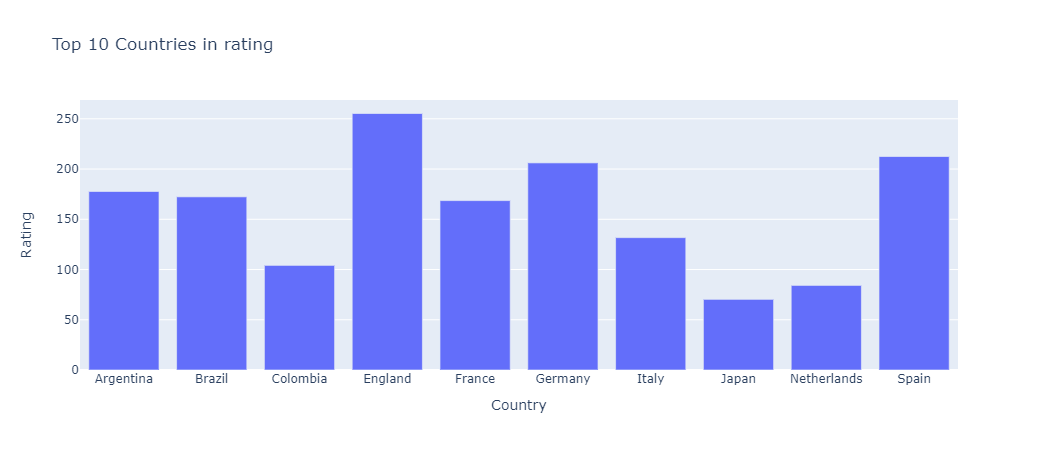

In [10]:
new_avg['rank_weighted_avg'] = pd.DataFrame(new_avg.weighted_avg.rank(method='first',ascending=False)).astype(np.int32)
new_avg = new_avg[new_avg.rank_weighted_avg < 11]
fig = px.bar(x=new_avg.Nationality, y=new_avg.weighted_avg,labels={'x':'Country','y':'Rating'},
            title='Top 10 Countries in rating')
fig.show()

### Observation
- Ther bar graph shows the top 10 countries out of 164 countries in overall rating.
- X-axis represent country.
- Y-axis represent overall rating.
- England at the top followed by Spain and Germany. 

## Display the distribution of the positions of all players in Fifa 2019.
- 'position' - players playing position on ground.

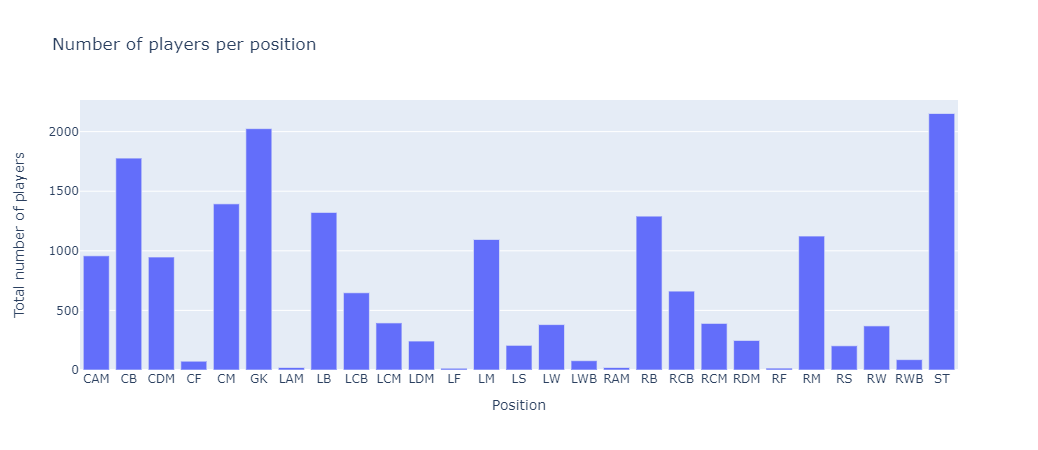

In [11]:
dis_position = data.filter(['ID','Position'])
dis_position = pd.DataFrame(dis_position.groupby(['Position']).ID.count())
dis_position.reset_index(level=0,inplace=True)
fig = px.bar(x=dis_position.Position, y=dis_position.ID,labels={'x':'Position','y':'Total number of players'},
            title='Number of players per position')
fig.show()

### Observation
- X-axis represent playing position of players.
- Y-axis number of players.
- Maimum number of players are Striker(ST) followed by Goal keeper(GK).

## When does the contract expire for the players?
- 'Contract' - each player contract ending date is given 

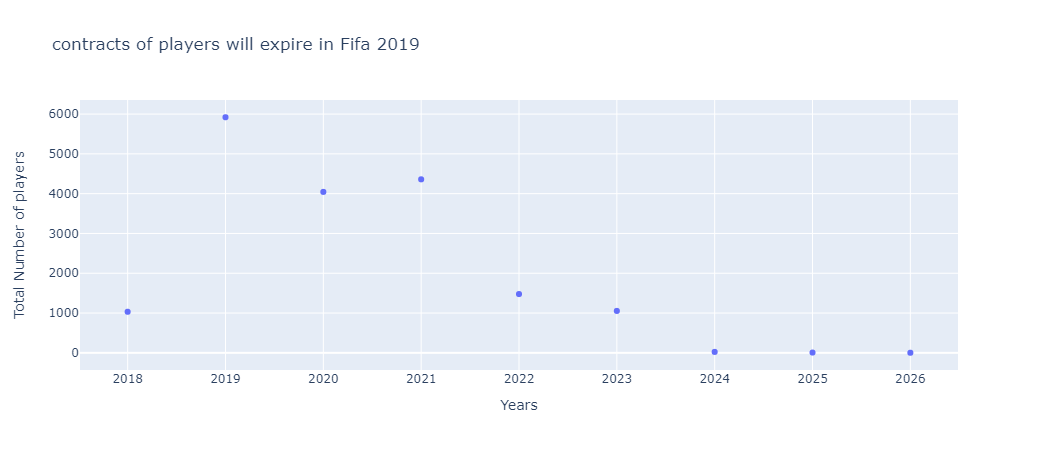

In [18]:
contract = data.filter(['ID','Name','Contract Valid Until'])
contract.isnull().sum()
contract.dropna(inplace=True)
contract['contract_year'] = pd.DatetimeIndex(contract['Contract Valid Until']).year
contract = contract.groupby(['contract_year']).agg(count_player=('contract_year','count'))
contract.reset_index(level=[0],inplace=True)
fig = px.scatter(x=contract.contract_year, y=contract.count_player,
                 labels={'x':'Years','y':'Total Number of players'},title='contracts of players will expire in Fifa 2019')
fig.show()

### Observation
- X-axis represent years
- Y-axis represent total number of players.
- Maximum players(5920) contract expires in 2019.
- There are only 2 players and there contract will expire in 2026.

## The distribution of players values.
- 'value' given in euros

[10, 7, 9, 8, 6, 5, 4, 3, 1, 2]
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]


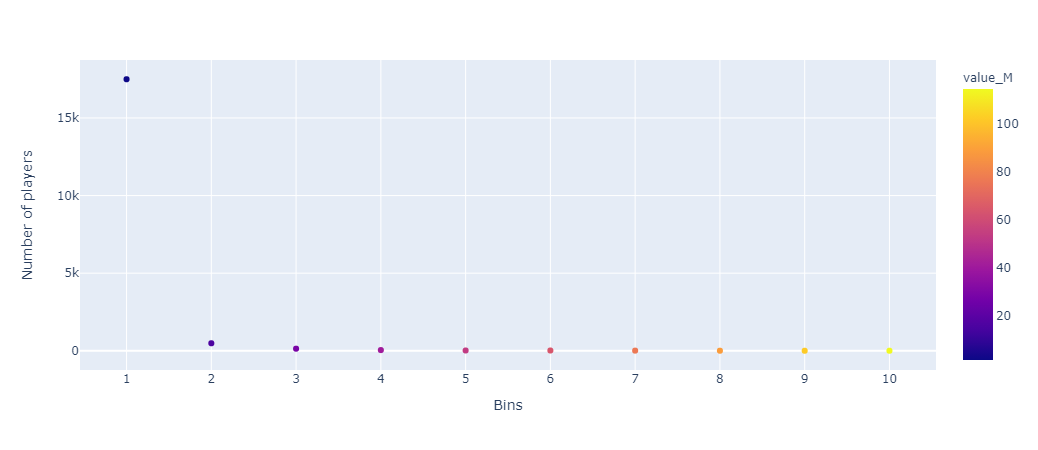

In [14]:
value_dataset = data.filter(['ID','Value'])
value_dataset['value_M'] = value_dataset.Value.apply(change_form_of_value)
value_dataset['value_M'] = value_dataset.value_M/1000000
value_dataset['bin'] = pd.cut(x=value_dataset.value_M, bins=10, labels= range(1,11))
print(value_dataset.bin.unique())

value_groups = value_dataset.groupby(['bin']).agg({'ID': 'count', 'value_M': 'mean'}).reset_index(level=[0])

fig = px.scatter(data_frame=value_groups, x='bin', y='ID', color='value_M')
fig.update_xaxes(type='category')
fig.update_xaxes(title_text="Bins")
fig.update_yaxes(title_text="Number of players")
fig.show()

### Observation
- X-axis represent bins(value in millions divided in range).
- Y-axis represent number of players
- There are total 10 bins in increasing order from 1 to 10, value in range is given below.
- (-0.119, 11.85) < (11.85, 23.7) < (23.7, 35.55) < (35.55, 47.4) ... (71.1, 82.95) < (82.95, 94.8) < (94.8, 106.65) < (106.65, 118.5)
- The first bin contains the maximum number of players which is 17495. It may be because they have a lack of experience or low potential/rating. 
- Only 2 players are in bin 10 which is the highest in terms of value.

## The age distribution among players.
- Age

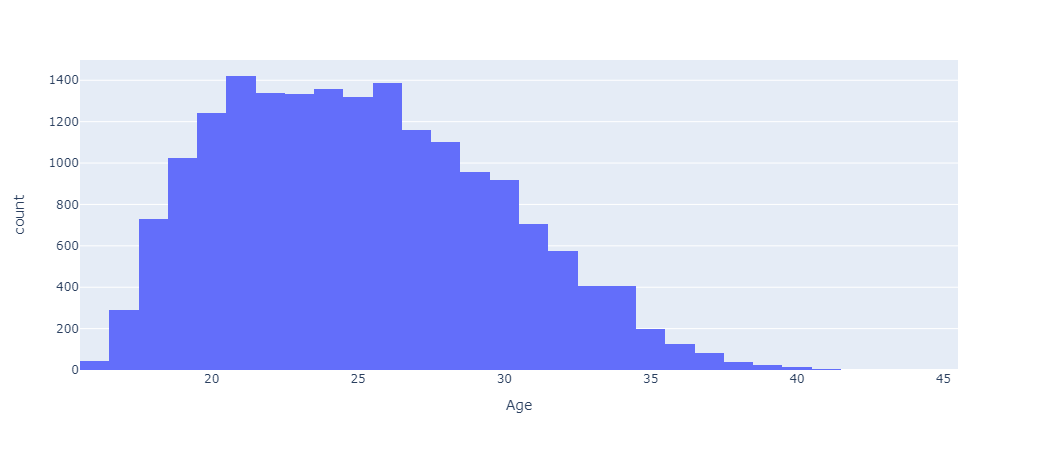

In [15]:
age = data.filter(['ID','Age'])
age.isnull().sum()
fig = px.histogram(age, x="Age")
fig.show()

### Observation
- Age on x-axis.
- Number of players on y-axis.
- Age 21 have maximum number of players followed by age 26.
- Age 22 and 23 have almost same number of players.
- From age 21 to 26 have maximum number of players 

## The top 10 potential players.
- potential is defined for each player.

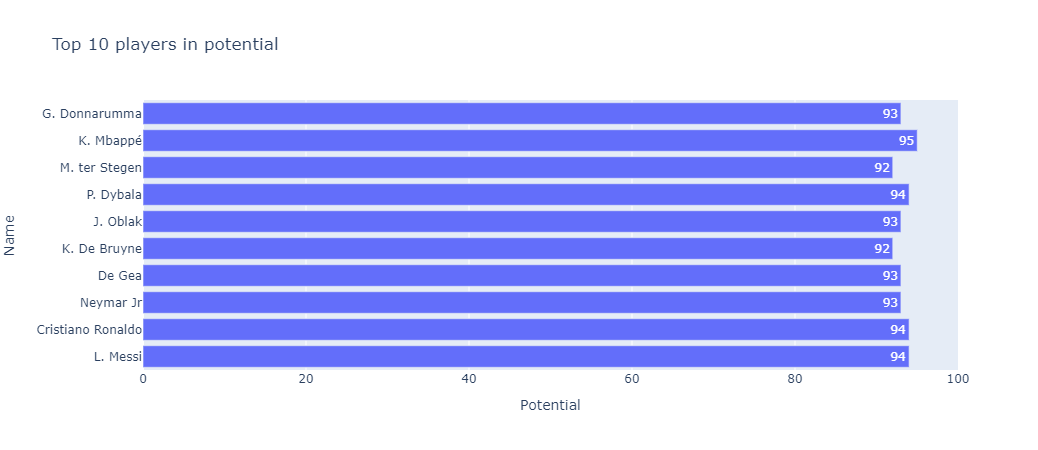

In [16]:
player_potential = data.filter(['ID','Name','Potential'])
player_potential.isnull().sum()
player_potential['rank_potential'] = player_potential.Potential.rank(method='first',ascending=False).astype(np.int32)
player_potential = player_potential[player_potential.rank_potential < 11]
fig = px.bar(data_frame=player_potential, y='Name', x='Potential',
            text="Potential",title='Top 10 players in potential')
fig.update_traces(textposition='inside')
fig.show()

### Observation
- X-axis represent potential of players.
- Y-axis represent players name.
- The bar graph represent top 10 players with maximum potential.
- K.Mbappe is at the top in the list.
- L.Messi, Cristiano Ronaldo, and P.Dybala have the same potential of 94.
- Out of the top 10, 4 players have the same potential of 93.